<a href="https://colab.research.google.com/github/ashish899999/CNN-Projects/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import json
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection  import train_test_split

In [2]:
kaggle_dictionary=json.load(open("kaggle.json"))


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # image processing
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files=os.listdir('/content/data/with_mask') # contains all files name in this mask folder
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2263.jpg', 'with_mask_2885.jpg', 'with_mask_47.jpg', 'with_mask_2107.jpg', 'with_mask_329.jpg']
['with_mask_2387.jpg', 'with_mask_2590.jpg', 'with_mask_167.jpg', 'with_mask_2669.jpg', 'with_mask_3094.jpg']


In [7]:
without_mask_files=os.listdir('/content/data/without_mask') # contains all files name in this mask folder
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_787.jpg', 'without_mask_2723.jpg', 'without_mask_3578.jpg', 'without_mask_688.jpg', 'without_mask_1561.jpg']
['without_mask_988.jpg', 'without_mask_2840.jpg', 'without_mask_2978.jpg', 'without_mask_2374.jpg', 'without_mask_3824.jpg']


In [8]:
print('number of masked image:', len(with_mask_files))
print('number of without_mask image:', len(without_mask_files))


number of masked image: 3725
number of without_mask image: 3828


In [9]:
# nowe we need to lable the image ,0/1
# with mask label ->1
# wihtout mask label->0

In [10]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [12]:
labels=with_mask_labels+ without_mask_labels
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
# displaying image

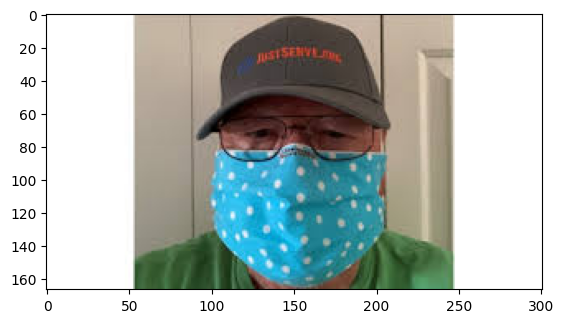

In [14]:
img=mpimg.imread('/content/data/with_mask/with_mask_2789.jpg') # displaying a img as numpy
imgplot=plt.imshow(img)
plt.show()

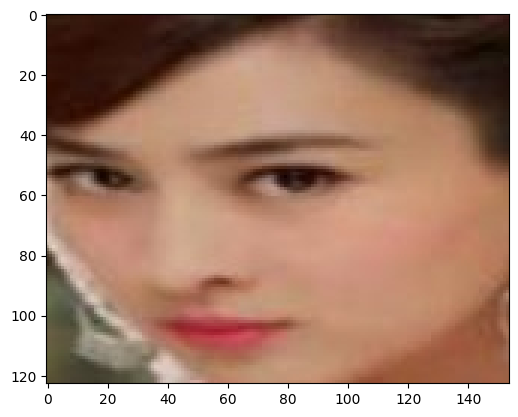

In [15]:
# displaying wihtout mask image
img=mpimg.imread('/content/data/without_mask/without_mask_2957.jpg')
imgplot=plt.imshow(img)
plt.show()

all images are of different shape so we need to fix this

image prcoessing:
1.resize image
2. convert images to numpy arrays

In [16]:
# convert images to numpy arrays+
with_mask_path='/content/data/with_mask/' # add / at end , as we need to concatenate
data=[]
# mask file contains all file of mask images
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file ) # equivalent to '/content/data/with_mask/ + 'with_mask_2885.jpg'== '/content/data/without_mask/without_mask_2957.jpg'
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file )
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [55]:
type(data)

list

In [17]:
data

[array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[224, 199, 187],
         [164, 131, 118],
         [183, 142, 127],
         ...,
         [229, 189, 167],
         [220, 180, 158],
         [211, 171, 149]],
 
        [[181, 146, 131],
         [174, 135, 120],
         [186, 141, 123],
         ...,
         [228, 191, 170],
         [219, 181, 160],
         [210, 172, 151]],
 
        [[167, 129, 113],
         [176, 134, 117],
         [188, 142, 123],
         ...,
         [228, 192, 170],
  

In [18]:
len(data)

7553

array([[[176, 192, 175],
        [165, 182, 160],
        [165, 181, 151],
        ...,
        [ 70,  75,  60],
        [ 65,  68,  51],
        [ 52,  52,  32]],

       [[182, 193, 176],
        [167, 179, 162],
        [152, 165, 146],
        ...,
        [ 73,  87,  59],
        [ 60,  73,  46],
        [ 76,  87,  61]],

       [[159, 171, 155],
        [180, 193, 182],
        [163, 176, 170],
        ...,
        [109, 118,  93],
        [158, 165, 145],
        [125, 132, 114]],

       ...,

       [[ 31,  71,  95],
        [ 29,  70,  95],
        [ 30,  73,  98],
        ...,
        [215, 183, 172],
        [208, 182, 173],
        [206, 181, 173]],

       [[ 27,  72,  96],
        [ 29,  74,  99],
        [ 31,  75, 101],
        ...,
        [202, 181, 173],
        [197, 182, 180],
        [186, 174, 177]],

       [[ 30,  76, 100],
        [ 31,  77, 102],
        [ 27,  70,  98],
        ...,
        [207, 199, 195],
        [189, 184, 188],
        [173, 169, 179]]], dtype=uint8)
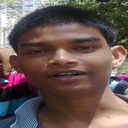

In [19]:
data[3888]

In [20]:
# converting image list and label list into numpy array
x=np.array(data)
y=np.array(labels)

In [21]:
x

array([[[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        ...,

        [[224, 199, 187],
         [164, 131, 118],
         [183, 142, 127],
         ...,
         [229, 189, 167],
         [220, 180, 158],
         [211, 171, 149]],

        [[181, 146, 131],
         [174, 135, 120],
         [186, 141, 123],
         ...,
         [228, 191, 170],
         [219, 181, 160],
         [210, 172, 151]],

        [[167, 129, 113],
         [176, 134, 117],
         [188, 142, 123],
         ...,
         [228, 192, 170],
        

In [22]:
print(x.shape)

(7553, 128, 128, 3)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(X_train.shape,X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# scalling ur data

In [56]:
x_train_scaled=X_train/255

x_test_scaled=X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
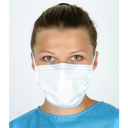

In [57]:
X_train[0]

In [58]:
x_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [29]:
# building cnn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Dense,Embedding,LSTM,Conv2D,MaxPooling2D,Flatten,Dropout


In [30]:
number_of_classes=2
model=Sequential()
# filter =32
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(number_of_classes,activation='sigmoid'))



In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [60]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [33]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=20 )

Epoch 1/20
170/170 [==============================] - 10s 24ms/step - loss: 0.4636 - accuracy: 0.8050 - val_loss: 0.3038 - val_accuracy: 0.8777
Epoch 2/20
170/170 [==============================] - 3s 19ms/step - loss: 0.2847 - accuracy: 0.8854 - val_loss: 0.2659 - val_accuracy: 0.8893
Epoch 3/20
170/170 [==============================] - 3s 17ms/step - loss: 0.2454 - accuracy: 0.8992 - val_loss: 0.2247 - val_accuracy: 0.9025
Epoch 4/20
170/170 [==============================] - 3s 17ms/step - loss: 0.2011 - accuracy: 0.9169 - val_loss: 0.2735 - val_accuracy: 0.8992
Epoch 5/20
170/170 [==============================] - 3s 17ms/step - loss: 0.1685 - accuracy: 0.9334 - val_loss: 0.2406 - val_accuracy: 0.9058
Epoch 6/20
170/170 [==============================] - 3s 19ms/step - loss: 0.1607 - accuracy: 0.9354 - val_loss: 0.2179 - val_accuracy: 0.9223
Epoch 7/20
170/170 [==============================] - 3s 17ms/step - loss: 0.1330 - accuracy: 0.9448 - val_loss: 0.2720 - val_accuracy: 0.917

In [59]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test accuracy:',accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2841 - accuracy: 0.9411
test accuracy: 0.9410986304283142


In [ ]:
# traning accuracy=98%
# testing accuracy=84%

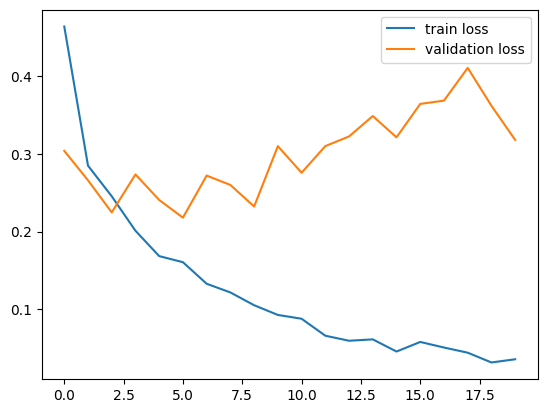

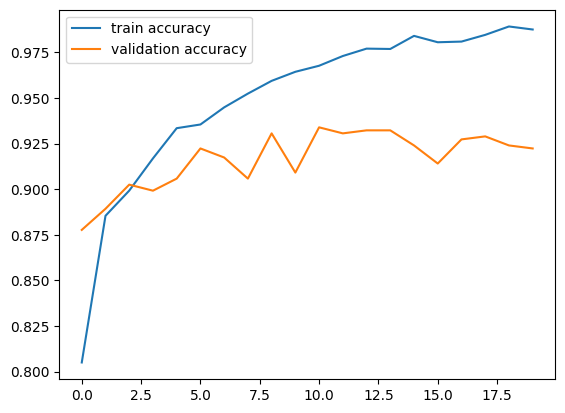

In [38]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [39]:
# building a predictive system

path of image to be predicted:/content/images.jpeg


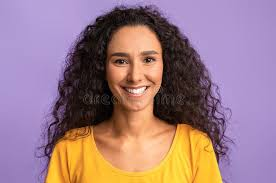

1/1 [==============================] - 0s 17ms/step
[[0.41759747 0.73156416]]
1
the person is in image is wearing a mask


In [54]:
input_image_path=input('path of image to be predicted:')
input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction) # done to convert probability value in 0/1

print(input_pred_label)

if input_pred_label == 1:
  print('the person is in image is wearing a mask')

else:
  print('the person is in image is not wearing a mask')

Path of the image to be predicted: /content/young-man-wearing-black-face-260nw-1696092880.webp


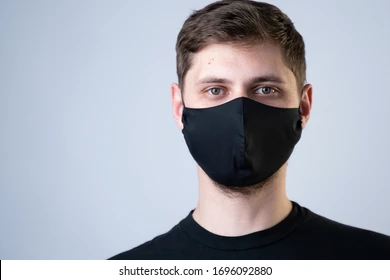

1/1 [==============================] - 0s 19ms/step
[[6.4282875e-05 9.9651343e-01]]
1
The person in the image is wearing a mask


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/images (2).jpeg


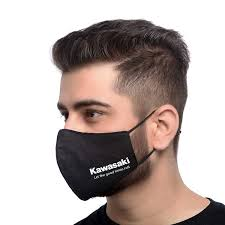

1/1 [==============================] - 0s 18ms/step
[[1.8253058e-07 9.9954623e-01]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/59969f4c8e317f5b980210aace1391ca.jpg


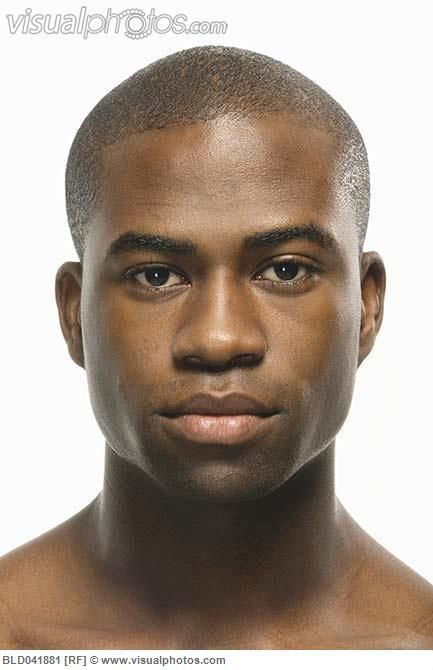

1/1 [==============================] - 0s 42ms/step
[[0.9530483 0.2636535]]
0
The person in the image is not wearing a mask


In [64]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')